# Recognizing hand-written digits with neural networks

**Neural network Python libraries**
- *Keras*: High level library based on Tensorflow (or others) that is easy to use and flexible enough for most standard users. It has a great documentation and online support. 
- *Tensorflow*: Google's neural network library. Most widely used in ML research. Flexible and powerful but also (unnecessarily?) complicated.
- *Pytorch*: The newcomer developed by Facebook. Flexible like Tensorflow but with a nicer, more Pythonic API.

In this notebook we will tackle a classification task, recognizing hand-written digits of the famous MNIST dataset.

In [1]:
%matplotlib inline
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


## MNIST - Preparing and exploring the data

Keras has a handy function to download the entire MNIST dataset which consists of 60,000 training images and 10000 test images.

In [18]:
(x_trn, y_trn), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
x_trn.shape, y_trn.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**STOP!** What are training, validation and test sets?

- Training set: Data used to optimize the machine learning algorithm
- Validation set: Data used to independently verify the skill of the algorithm
- Test set: Another independent set used for *final* verification.

Let's make a validation set.

In [20]:
x_trn, x_val, y_trn, y_val = train_test_split(x_trn, y_trn, test_size=0.2)

In [21]:
x_trn.shape, x_val.shape

((48000, 28, 28), (12000, 28, 28))

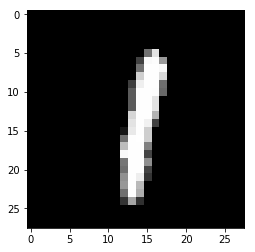

In [24]:
plt.imshow(x_trn[0], cmap='gray');

In [25]:
y_trn[:5]

array([1, 3, 2, 7, 1], dtype=uint8)

For gradient descent to work efficiently it is important that all the input variables or features are roughly on the same order of magnitude. Typically, we try to get them around 1.

In [26]:
def normalize(x): return x / 255

In [27]:
x_trn = normalize(x_trn)
x_val = normalize(x_val)

In [28]:
x_trn[0, 12:15, 12:15]

array([[ 0.        ,  0.35686275,  0.99607843],
       [ 0.        ,  0.83921569,  0.99607843],
       [ 0.        ,  0.89411765,  0.99607843]])

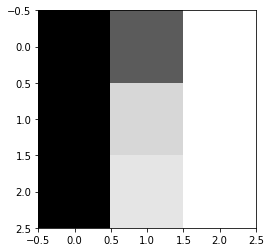

In [30]:
plt.imshow(x_trn[0, 12:15, 12:15], cmap='gray');

Now we will do something pretty dumb. We will flatten out the images and throw away all spatial information.

In [31]:
def flatten(x): return x.reshape(x.shape[0], -1)

In [32]:
x_trn = flatten(x_trn)
x_val = flatten(x_val)

In [33]:
x_trn.shape

(48000, 784)

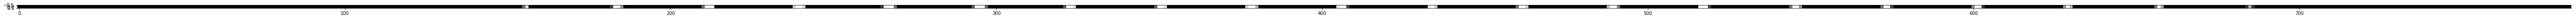

In [37]:
fig = plt.figure(figsize=(100, 1))
plt.imshow(x_trn[0, None, :], cmap='gray');

We are dealing here w

In [42]:
y_trn = to_categorical(y_trn)
y_val = to_categorical(y_val)

In [43]:
y_trn[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [48]:
linear_model = Sequential([
    Dense(10, input_shape=(784,), activation='softmax'),
])

In [36]:
def softmax(x):
    np.exp(x) / np.sum(np.exp(x))

In [35]:
x = [2, 6, 3, 5]

In [37]:
np.exp(x)

array([   7.3890561 ,  403.42879349,   20.08553692,  148.4131591 ])

In [39]:
out = np.exp(x) / np.sum(np.exp(x))
out, out.sum()

(array([ 0.01275478,  0.69638749,  0.03467109,  0.25618664]), 1.0)

In [49]:
linear_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [50]:
linear_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [52]:
linear_model.fit(x_trn, y_trn, batch_size=512, epochs=10, validation_data=(x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.3046 - acc: 0.9162 - val_loss: 0.3220 - val_acc: 0.9123
Epoch 2/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.2985 - acc: 0.9177 - val_loss: 0.3172 - val_acc: 0.9128
Epoch 3/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.2935 - acc: 0.9195 - val_loss: 0.3135 - val_acc: 0.9149
Epoch 4/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.2892 - acc: 0.9201 - val_loss: 0.3099 - val_acc: 0.9145
Epoch 5/10
48000/48000 [==============================] - 1s 19us/step - loss: 0.2853 - acc: 0.9212 - val_loss: 0.3082 - val_acc: 0.9167
Epoch 6/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.2822 - acc: 0.9221 - val_loss: 0.3043 - val_acc: 0.9180
Epoch 7/10
48000/48000 [==============================] - 1s 20us/step - loss: 0.2790 - acc: 0.9231 - val_loss: 0.3032 - val_acc

In [53]:
neural_net = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [54]:
neural_net.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [56]:
neural_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [55]:
neural_net.fit(x_trn, y_trn, batch_size=512, epochs=10, validation_data=(x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.4655 - acc: 0.8733 - val_loss: 0.2510 - val_acc: 0.9318
Epoch 2/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.1991 - acc: 0.9444 - val_loss: 0.1827 - val_acc: 0.9478
Epoch 3/10
48000/48000 [==============================] - 5s 104us/step - loss: 0.1443 - acc: 0.9594 - val_loss: 0.1445 - val_acc: 0.9597
Epoch 4/10
48000/48000 [==============================] - 5s 105us/step - loss: 0.1107 - acc: 0.9689 - val_loss: 0.1228 - val_acc: 0.9638
Epoch 5/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0889 - acc: 0.9750 - val_loss: 0.1087 - val_acc: 0.9689
Epoch 6/10
48000/48000 [==============================] - 5s 107us/step - loss: 0.0715 - acc: 0.9800 - val_loss: 0.1050 - val_acc: 0.9698
Epoch 7/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0597 - acc: 0.9835 - val_loss: 0.0934 - v

In [57]:
neural_net2 = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [58]:
neural_net2.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [59]:
neural_net2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [60]:
neural_net2.fit(x_trn, y_trn, batch_size=512, epochs=10, validation_data=(x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.4044 - acc: 0.8884 - val_loss: 0.1955 - val_acc: 0.9426
Epoch 2/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.1438 - acc: 0.9574 - val_loss: 0.1360 - val_acc: 0.9599
Epoch 3/10
48000/48000 [==============================] - 6s 135us/step - loss: 0.0938 - acc: 0.9721 - val_loss: 0.1021 - val_acc: 0.9694
Epoch 4/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.0661 - acc: 0.9803 - val_loss: 0.0943 - val_acc: 0.9707
Epoch 5/10
48000/48000 [==============================] - 7s 135us/step - loss: 0.0481 - acc: 0.9864 - val_loss: 0.0899 - val_acc: 0.9733
Epoch 6/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.0370 - acc: 0.9899 - val_loss: 0.0869 - val_acc: 0.9758
Epoch 7/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.0267 - acc: 0.9928 - val_loss: 0.0832 - 